In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pickle
import h5py

In [ ]:
total_subjects=['sub1','sub2','sub3','sub4','sub5','sub6','sub7','sub8','sub9','sub10','sub11','sub12','sub13','sub14','sub15']

lefthemi_subjects = ['sub1','sub2','sub3','sub4','sub5','sub6','sub10','sub13','sub14','sub15']
righthemi_subjects = ['sub3','sub7','sub8','sub9','sub11','sub12']

colors = ["red", "darkblue", "green", "magenta", "purple", "pink", "skyblue","gold","brown","orange","lime","yellow","black","olive","darkorange"]
print(len(total_subjects))
freq_name = ['theta','alpha','beta','LG1','LG2','HG']

In [ ]:
strip_grid_no_list={'sub1':[0,1,2,3],
                    'sub2':[0,1,2,3,4,5],
                    'sub3':[0,1,2,3,4],
                    'sub4':[0,1,2,3,4],
                    'sub5':[0,1,2,3],
                    'sub6':[0,1,2,3,4],
                    'sub7':[0,1,2],
                    'sub8':[0,2,3],
                    'sub9':[0,1,2,3],
                    'sub10':[0,1],
                    'sub11':[0,1,2],
                    'sub12':[0,1,2],
                    'sub13':[0,1,2,3],
                    'sub14':[0,1,2,3],
                    'sub15':[0,1,2,3,4]
}
                   

# Among the two lists in badnull_ans_dict, the first contains cases where the answer was stated incorrectly (i.e., the opposite of the correct answer), and the second contains experimental errors—such as failing to give an answer, speaking during the baseline period, or similar issues.
liv_nonliv_badnull_ans_dict = {'sub1': [[], []],
                               'sub2': [[], []],
                               'sub3': [[49], []],
                               'sub4': [[], []],
                               'sub5': [[5, 7], []],
                               'sub6': [[41], [17]],
                               'sub7': [[], []],
                               'sub8': [[], [33]],
                               'sub9' : [[8],[13]],
                               'sub10' : [[],[36]],
                               'sub11' : [[],[]],
                               'sub12' : [[],[]],
                               'sub13' : [[16],[]],
                               'sub14': [[10], [23]],
                               'sub15': [[], []],
                               }


body_nonbody_badnull_ans_dict = {'sub1': [[], []],
                               'sub2': [[], []],
                               'sub3': [[], []],
                               'sub4': [[], [3,7]],
                               'sub5': [[], []],
                               'sub6': [[], []],
                               'sub7': [[], []],
                               'sub8': [[], []],
                               'sub9' : [[],[]],
                               'sub10' : [[],[4]],
                               'sub11' : [[],[]],
                               'sub12' : [[],[]],
                               'sub13' : [[],[]],
                               'sub14': [[], [0]],
                               'sub15': [[], []],
                               }


body_nonbody_badnull_ans_dict = {'sub1': [[], []],
                                 'sub2': [[], []],
                                 'sub3': [[], []],
                                 'sub4': [[], [3+72, 7+72]],
                                 'sub5': [[], []],
                                 'sub6': [[], []],
                                 'sub7': [[], []],
                                 'sub8': [[], []],
                                 'sub9' : [[],[]],
                                 'sub10' : [[i for i in range(54,72)],[4+72]+[i for i in range(126,144)]],
                                 'sub11' : [[],[]],
                                 'sub12' : [[],[]],
                                 'sub13' : [[],[]],
                                 'sub14': [[], [0+72]],
                                 'sub15': [[], []],
                                 }


In [ ]:
with open("l_new_map_data.pkl", 'rb') as f:
        l_map_data = pickle.load(f)
with open("r_new_map_data.pkl", 'rb') as f:
        r_map_data = pickle.load(f)

In [24]:
l_map_data.shape, r_map_data.shape

((442, 4), (182, 4))

In [ ]:
#0 : neg 1 : con, 2: con x neg 3: con x neg + interatcion
print(np.max(l_map_data[:,0]),np.max(l_map_data[:,1]),np.max(l_map_data[:,2]),np.max(l_map_data[:,3]))
print(np.max(r_map_data[:,0]),np.max(r_map_data[:,1]),np.max(r_map_data[:,2]),np.max(r_map_data[:,3]))

0.37899481750229247 0.34292514978786287 0.39154951475889493 0.6632280619483091
0.46814045873451676 0.3589879100899798 0.657240914888524 0.8841522960332607


In [31]:
l_r_list=[[],[],[],[]]
for i in range(442):
    l_r_list[np.argmax(l_map_data[i,:])].append(np.max(l_map_data[i,:]))

r_r_list=[[],[],[],[]]
for i in range(182):
    r_r_list[np.argmax(r_map_data[i,:])].append(np.max(r_map_data[i,:]))

In [ ]:
len(l_r_list[0]), len(l_r_list[1]),len(l_r_list[2]),len(l_r_list[3])


(146, 152, 48, 96)

In [32]:
len(r_r_list[0]), len(r_r_list[1]),len(r_r_list[2]),len(r_r_list[3])

(70, 57, 21, 34)

In [ ]:
import numpy as np

def mann_whitney_u_test(x, y, alternative="two-sided", method="auto"):

    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    n1, n2 = len(x), len(y)
    if n1 == 0 or n2 == 0:
        raise ValueError("at least have more than >0")

    from scipy.stats import mannwhitneyu

    res = mannwhitneyu(x, y, alternative=alternative, method=method)
    U = float(res.statistic)
    p = float(res.pvalue)

    # 효과크기
    A = U / (n1 * n2)            # Probability of superiority
    delta = 2 * A - 1            # Cliff's delta == rank-biserial correlation

    return {
        "U": U,
        "pvalue": p,
        "A": A,
        "cliffs_delta": delta,
        "n1": n1, "n2": n2,
    }


In [ ]:
mann_whitney_u_test(l_r_list[0],r_r_list[0])

{'U': 4937.0,
 'pvalue': 0.6882297039691476,
 'A': 0.4830724070450098,
 'cliffs_delta': -0.03385518590998038,
 'n1': 146,
 'n2': 70}

In [35]:
mann_whitney_u_test(l_r_list[1],r_r_list[1])

{'U': 4133.0,
 'pvalue': 0.6102060331299974,
 'A': 0.4770313942751616,
 'cliffs_delta': -0.045937211449676774,
 'n1': 152,
 'n2': 57}

In [38]:
mann_whitney_u_test(l_r_list[2],r_r_list[2])

{'U': 543.0,
 'pvalue': 0.6156119436990257,
 'A': 0.5386904761904762,
 'cliffs_delta': 0.07738095238095233,
 'n1': 48,
 'n2': 21}

In [37]:
mann_whitney_u_test(l_r_list[3],r_r_list[3])

{'U': 1621.0,
 'pvalue': 0.9556406323700087,
 'A': 0.4966299019607843,
 'cliffs_delta': -0.006740196078431349,
 'n1': 96,
 'n2': 34}

In [ ]:
l_total_pat_r_Q_max = []
r_total_pat_r_Q_max = []
for pat_name in total_subjects:
    r_Q_path = "save_dir/"+pat_name+"_corr_r.pkl"
    with open(r_Q_path, 'rb') as f:
        pat_r_data_Q_raw = pickle.load(f)
    print(pat_r_data_Q_raw.shape)
    pat_r_data_Q = np.mean(pat_r_data_Q_raw,axis=5)[0,:,5,:,:] 
    print(pat_r_data_Q.shape)
    pat_r_Q_max = np.max(pat_r_data_Q,axis=2)
    

(2, 4, 6, 47, 6, 500)
(4, 47, 6)
(2, 4, 6, 66, 6, 500)
(4, 66, 6)
(2, 4, 6, 53, 6, 500)
(4, 53, 6)
(2, 4, 6, 62, 6, 500)
(4, 62, 6)
(2, 4, 6, 56, 6, 500)
(4, 56, 6)
(2, 4, 6, 80, 6, 500)
(4, 80, 6)
(2, 4, 6, 24, 6, 500)
(4, 24, 6)
(2, 4, 6, 41, 6, 500)
(4, 41, 6)
(2, 4, 6, 23, 6, 500)
(4, 23, 6)
(2, 4, 6, 12, 6, 500)
(4, 12, 6)
(2, 4, 6, 15, 6, 500)
(4, 15, 6)
(2, 4, 6, 28, 6, 500)
(4, 28, 6)
(2, 4, 6, 48, 6, 500)
(4, 48, 6)
(2, 4, 6, 28, 6, 500)
(4, 28, 6)
(2, 4, 6, 41, 6, 500)
(4, 41, 6)


In [ ]:

import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score

ver=11
iter_num = 10000
np.random.seed(42)  # 고정된 랜덤 시드 설정
random_seeds = np.random.randint(0, 10000000, size=iter_num)
old_threshold = 0.05 / 11 / 624 / 4
new_threshold = 0.05 / 48 / 624 / 4


l_total_pat_r_Q_max = []
l_total_pat_r_Q_argmax = []
l_total_pat_p_Q=[]
l_total_pat_r_TR_A_maxs = []
l_total_pat_r_TR_A_totmax = []
l_total_pat_p_TR_A = []
l_subject_indexs=[]
l_subject_indexcnt=[0]
r_total_pat_r_Q_max = []
r_total_pat_r_Q_argmax = []
r_total_pat_p_Q=[]
r_total_pat_r_TR_A_maxs = []
r_total_pat_r_TR_A_totmax = []
r_total_pat_p_TR_A = []
r_subject_indexs=[]
r_subject_indexcnt=[0]
freq_name = ['theta','alpha','beta','LG1','LG2','HG']
pat_cnt = -1
left_pat_cnt =0
right_pat_cnt =0
for pat_name in total_subjects:
    pat_cnt +=1
    #print(pat_name)
    r_Q_path = "D:/semECOG/250125_r_r2/"+pat_name+"_corr_r.pkl"
    with open(r_Q_path, 'rb') as f:
        pat_r_data_Q_raw = pickle.load(f)
    pat_r_data_Q = np.mean(pat_r_data_Q_raw,axis=5)[0,:,5,:,:] #type3, freq HG, time index 1부터 : (재일 앞은 Q 뒤구간임)
    print(pat_r_data_Q.shape)
    pat_r_Q_max = np.max(pat_r_data_Q,axis=2)
    pat_r_Q_argmax = np.argmax(pat_r_data_Q,axis=2)

    p_Q_path = "D:/semECOG/250125_r_r2/"+pat_name+"_p_and_t.pkl"
    with open(p_Q_path, 'rb') as f:
        pat_p_data_Q_raw = pickle.load(f)
    pat_p_data_Q = pat_p_data_Q_raw[0][1,:,5,:,:]
    print(pat_p_data_Q.shape)
    pat_p_data_Q_maxpoint = np.zeros(pat_r_Q_max.shape)
    for i in range(4):
      for k in range(pat_p_data_Q_maxpoint.shape[1]):
        pat_p_data_Q_maxpoint[i,k] = pat_p_data_Q[i,k,pat_r_Q_argmax[i,k]]
    
    

    r_TR_A_path = "save_dir/"+pat_name+"_corr_r_TR_A_onlyHG.pkl"
    with open(r_TR_A_path, 'rb') as f:
        pat_r_data_TR_A_raw = pickle.load(f)
    pat_r_data_TR_A = np.mean(pat_r_data_TR_A_raw,axis=5)[0,:,5,:,1:]
    print(pat_r_data_TR_A.shape)
    pat_r_TR_A_max = np.max(pat_r_data_TR_A,axis=2)   
    pat_r_TR_A_argmax = np.argmax(pat_r_data_TR_A,axis=2)
    
    p_TR_A_path = "save_dir/"+pat_name+"_p_and_t_TR_A_onlyHG.pkl"
    with open(p_TR_A_path, 'rb') as f:
        pat_p_data_TR_A_raw = pickle.load(f)
    pat_p_data_TR_A = pat_p_data_TR_A_raw[0][1,:,5,:,1:]
    print(pat_r_data_TR_A.shape)
    pat_p_data_TR_A_maxpoint = np.zeros(pat_r_TR_A_max.shape)
    for i in range(4):
       for k in range(pat_p_data_TR_A_maxpoint.shape[1]):
        pat_p_data_TR_A_maxpoint[i,k] = pat_p_data_TR_A[i,k,pat_r_TR_A_argmax[i,k]]

        
    pat_r_TR_A_maxs = np.transpose(np.array([np.max(pat_r_data_TR_A[:,:,0:8],axis=2),np.max(pat_r_data_TR_A[:,:,8:16],axis=2),np.max(pat_r_data_TR_A[:,:,16:24],axis=2),
                                      np.max(pat_r_data_TR_A[:,:,24:32],axis=2),np.max(pat_r_data_TR_A[:,:,32:40],axis=2),np.max(pat_r_data_TR_A[:,:,40:47],axis=2)]),(1,2,0))
    
    pat_r_TR_A_totmax= np.max(pat_r_data_TR_A,axis=2)
    if pat_name == "sub3":
        l_total_pat_r_Q_max.append(pat_r_Q_max[:,[40,41]].T)
        l_total_pat_r_TR_A_maxs.append(pat_r_TR_A_maxs[:,[40,41],:].T)
        l_total_pat_r_TR_A_totmax.append(pat_r_TR_A_totmax[:,[40,41]].T)
        l_total_pat_p_Q.append(pat_p_data_Q_maxpoint[:,[40,41]].T)
        l_total_pat_p_TR_A.append(pat_p_data_TR_A_maxpoint[:,[40,41]].T)
        l_total_pat_r_Q_argmax.append(pat_r_Q_argmax[:,[40,41]].T)
        r_chs_sub3 = [ i for i in range(53) if i not in [40,41]]
        r_total_pat_r_Q_max.append(pat_r_Q_max[:,r_chs_sub3].T)
        r_total_pat_r_Q_argmax.append(pat_r_Q_argmax[:,r_chs_sub3].T)
        r_total_pat_r_TR_A_maxs.append(pat_r_TR_A_maxs[:,r_chs_sub3,:].T)
        r_total_pat_r_TR_A_totmax.append(pat_r_TR_A_totmax[:,r_chs_sub3].T)
        r_total_pat_p_Q.append(pat_p_data_Q_maxpoint[:,r_chs_sub3].T)
        r_total_pat_p_TR_A.append(pat_p_data_TR_A_maxpoint[:,r_chs_sub3].T)  
        r_subject_indexs += [right_pat_cnt for i in range(51)]
        l_subject_indexs += [left_pat_cnt for i in range(2)]
        l_subject_indexcnt.append(len(l_subject_indexs))
        r_subject_indexcnt.append(len(r_subject_indexs))
        print(pat_name)
        print(left_pat_cnt)
        right_pat_cnt +=1
        left_pat_cnt +=1
    else:
        if pat_name in lefthemi_subjects:
            l_total_pat_r_Q_max.append(pat_r_Q_max.T)
            l_total_pat_r_Q_argmax.append(pat_r_Q_argmax.T)
            l_total_pat_r_TR_A_maxs.append( pat_r_TR_A_maxs.T)
            l_total_pat_r_TR_A_totmax.append(pat_r_TR_A_totmax.T)
            l_total_pat_p_Q.append(pat_p_data_Q_maxpoint.T)
            l_total_pat_p_TR_A.append(pat_p_data_TR_A_maxpoint.T)  
            print(pat_name)
            print(len(l_total_pat_r_Q_max))
            l_subject_indexs += [left_pat_cnt for i in range(pat_r_Q_max.shape[1])]
            left_pat_cnt +=1
            l_subject_indexcnt.append(len(l_subject_indexs))
        if pat_name in righthemi_subjects:
            r_total_pat_r_Q_max.append(pat_r_Q_max.T)
            r_total_pat_r_Q_argmax.append(pat_r_Q_argmax.T)
            r_total_pat_r_TR_A_maxs.append(pat_r_TR_A_maxs.T)
            r_total_pat_r_TR_A_totmax.append(pat_r_TR_A_totmax.T)
            r_total_pat_p_Q.append(pat_p_data_Q_maxpoint.T)
            r_total_pat_p_TR_A.append(pat_p_data_TR_A_maxpoint.T)  
            r_subject_indexs += [right_pat_cnt for i in range(pat_r_Q_max.shape[1])]
            right_pat_cnt +=1
            r_subject_indexcnt.append(len(r_subject_indexs))
l_total_pat_r_Q_max = np.concatenate(l_total_pat_r_Q_max)
l_total_pat_r_Q_argmax = np.concatenate(l_total_pat_r_Q_argmax)

l_total_pat_r_TR_A_maxs = np.concatenate(l_total_pat_r_TR_A_maxs,axis=1)
l_total_pat_r_TR_A_totmax = np.concatenate(l_total_pat_r_TR_A_totmax)           
l_total_pat_p_Q = np.concatenate(l_total_pat_p_Q)  
l_total_pat_p_TR_A = np.concatenate(l_total_pat_p_TR_A) 

r_total_pat_r_Q_max = np.concatenate(r_total_pat_r_Q_max)
r_total_pat_r_Q_argmax = np.concatenate(r_total_pat_r_Q_argmax)
r_total_pat_r_TR_A_maxs = np.concatenate(r_total_pat_r_TR_A_maxs,axis=1)
r_total_pat_r_TR_A_totmax = np.concatenate(r_total_pat_r_TR_A_totmax)
l_total_pat_p_Q = np.concatenate(l_total_pat_p_Q)  
l_total_pat_p_TR_A = np.concatenate(l_total_pat_p_TR_A)  



In [7]:
l_total_pat_r_TR_A_totmax.shape

(442, 4)

In [6]:
with open(file='left_new_bestmodel_byr.pickle', mode='rb') as f:
    left_bestmodel_index=pickle.load(f)
with open(file='right_new_bestmodel_byr.pickle', mode='rb') as f:
    right_bestmodel_index=pickle.load(f)

In [9]:
l_total_pat_r_Q_max.shape

(442, 4)

In [ ]:
with open(file="area_name__l_areaindex_total__r_areaindex_total.pickle",mode='rb') as f:
    area_datas = pickle.load(f)

In [16]:
area_datas

{'area_name': ['pSTG',
  'aSTG',
  'MTG',
  'ITG',
  'TP',
  'M1/PM',
  'SS',
  'pIFG',
  'aIFG',
  'DLPFC',
  'DMPFC',
  'OFC',
  'PH/PHT',
  'PL',
  'OL',
  'etc.'],
 'l_areaindex_total': [[22,
   23,
   24,
   26,
   27,
   28,
   31,
   32,
   33,
   36,
   47,
   48,
   49,
   52,
   53,
   54,
   57,
   58,
   59,
   62,
   63,
   64,
   71,
   77,
   78,
   150,
   151,
   152,
   208,
   209,
   276,
   277,
   284,
   292,
   322,
   323,
   371,
   372,
   427,
   428],
  [37,
   38,
   42,
   45,
   46,
   86,
   143,
   144,
   145,
   156,
   157,
   161,
   162,
   167,
   168,
   213,
   214,
   218,
   219,
   220,
   223,
   224,
   225,
   228,
   229,
   230,
   267,
   285,
   286,
   293,
   294,
   301,
   302,
   303,
   329,
   333,
   335,
   336,
   337,
   338,
   340,
   341,
   342,
   381,
   382,
   395,
   420,
   421,
   422,
   423,
   424,
   425],
  [20,
   21,
   25,
   29,
   30,
   34,
   35,
   40,
   41,
   67,
   68,
   69,
   70,
   75,
   76,

In [17]:
area_name= area_datas['area_name']
l_areaindex_total = area_datas['l_areaindex_total']
r_areaindex_total = area_datas['r_areaindex_total']

In [18]:
for i in range(16):
    print(len(l_areaindex_total[i]))

40
52
44
6
9
43
33
64
55
42
1
20
5
27
1
0


In [19]:
for i in range(16):
    print(len(l_areaindex_total[i]))

40
52
44
6
9
43
33
64
55
42
1
20
5
27
1
0


In [21]:
for i in range(442):
    if i in left_bestmodel_index[0][3]:
        print(l_subject_indexs[i])

4
7
7
7
7
7


In [23]:
area_name

['pSTG',
 'aSTG',
 'MTG',
 'ITG',
 'TP',
 'M1/PM',
 'SS',
 'pIFG',
 'aIFG',
 'DLPFC',
 'DMPFC',
 'OFC',
 'PH/PHT',
 'PL',
 'OL',
 'etc.']

In [70]:
colors = ["red", "darkblue", "green", "magenta", "purple", "pink", "skyblue","gold","brown","orange","lime","darkorange","black","olive","yellow","gray"]
markers = ["o","o","o","s","s","s","s","^","^","^","d","d","d","x","x","x"]

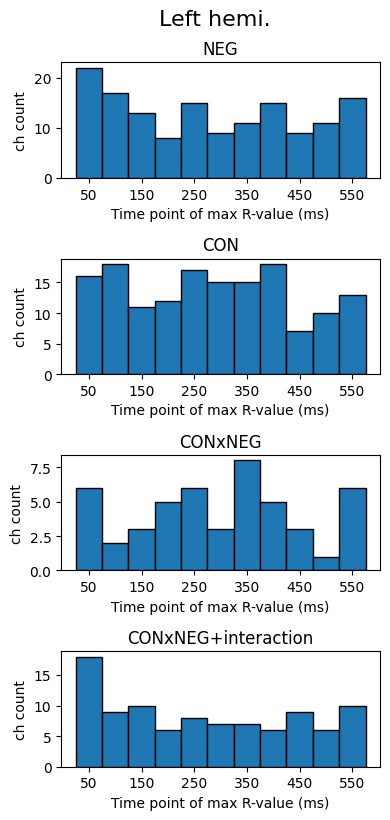

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

time_bin_centers = np.arange(50, 601, 50)  # [50, 100, ..., 550]

fig, axes = plt.subplots(4, 1, figsize=(4, 8))
axes = axes.flatten()
model_typename=["NEG","CON","CONxNEG","CONxNEG+interaction"]
for i in [1,0,2,3]:  # model types 0,1,2,3
    areaindex_type = [idx for idx in left_bestmodel_index[i]]
    type_time_idx = l_total_pat_r_Q_argmax[areaindex_type, i]  
    type_time_ms = time_bin_centers[type_time_idx] 
    
    ax = axes[i]
    ax.hist(type_time_ms, bins=time_bin_centers - 25, edgecolor='black')
    ax.set_title(model_typename[i])
    ax.set_xlabel("Time point of max R-value (ms)")
    ax.set_ylabel("ch count")
    ax.set_xticks(time_bin_centers[::2])

plt.tight_layout()
plt.suptitle("Left hemi.", fontsize=16, x=0.55, y=1.02)
plt.savefig(f"maxRtimepoint_leftthemi.png",dpi=300, bbox_inches='tight')
plt.show()

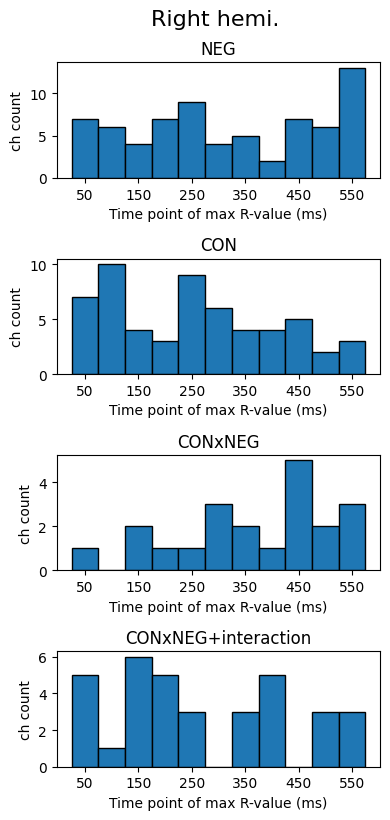

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


time_bin_centers = np.arange(50, 601, 50)  # [50, 100, ..., 550]

fig, axes = plt.subplots(4, 1, figsize=(4, 8))
axes = axes.flatten()
model_typename=["NEG","CON","CONxNEG","CONxNEG+interaction"]
for i in [1,0,2,3]:  # model types 0,1,2,3
    areaindex_type = [idx for idx in right_bestmodel_index[i]]
    type_time_idx = r_total_pat_r_Q_argmax[areaindex_type, i]  
    type_time_ms = time_bin_centers[type_time_idx]  
    
    ax = axes[i]
    ax.hist(type_time_ms, bins=time_bin_centers - 25, edgecolor='black')
    ax.set_title(model_typename[i])
    ax.set_xlabel("Time point of max R-value (ms)")
    ax.set_ylabel("ch count")
    ax.set_xticks(time_bin_centers[::2])

plt.tight_layout()
plt.suptitle("Right hemi.", fontsize=16, x=0.55, y=1.02)
plt.savefig(f"maxRtimepoint_righthemi.png",dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
each_area_values=[]
for area in range(14):
        area_value = [l_total_pat_r_Q_max[i,3] for i in l_areaindex_total[area] if i in left_bestmodel_index[3]]
        each_area_values.append(area_value)

In [ ]:
from scipy.stats import kruskal

h_stat, p_value = kruskal(*each_area_values)
print(h_stat, p_value)

import scikit_posthocs as sp

# 데이터 정리 (flattened Q 값과 그룹 이름)
q_vals_all = []
group_labels = []

for area in range(14):

    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[3]]
    
    for i in areaindex_type3:
        q_vals_all.append(l_total_pat_r_Q_max[i,3])
        group_labels.append(area_name[area])  # or f"Area{area}"



In [ ]:
df = pd.DataFrame({"Q": q_vals_all, "Group": group_labels})

group_counts = df["Group"].value_counts()

valid_groups = group_counts[group_counts >= 2].index
df_filtered = df[df["Group"].isin(valid_groups)]

each_area_values = [df_filtered[df_filtered["Group"] == g]["Q"].values for g in valid_groups]


h_stat, p_value = kruskal(*each_area_values)
print("Kruskal-Wallis H:", h_stat, "p:", p_value)

posthoc = sp.posthoc_dunn(df_filtered, val_col='Q', group_col='Group', p_adjust='fdr_bh')
print(posthoc)

Kruskal-Wallis H: 39.6726944907453 p: 1.9347235311761477e-05
          DLPFC       ITG     M1/PM       MTG       OFC        PL        SS  \
DLPFC  1.000000  0.291027  0.506487  0.229362  0.229362  0.273648  0.301444   
ITG    0.291027  1.000000  0.453985  0.833260  0.861244  0.852751  0.690093   
M1/PM  0.506487  0.453985  1.000000  0.453985  0.453985  0.466146  0.577730   
MTG    0.229362  0.833260  0.453985  1.000000  0.861244  0.976669  0.826358   
OFC    0.229362  0.861244  0.453985  0.861244  1.000000  0.876431  0.725473   
PL     0.273648  0.852751  0.466146  0.976669  0.876431  1.000000  0.833260   
SS     0.301444  0.690093  0.577730  0.826358  0.725473  0.833260  1.000000   
aIFG   0.266608  0.789558  0.466146  0.861244  0.833260  0.861244  0.861244   
aSTG   0.644869  0.453985  0.861244  0.393287  0.393287  0.453985  0.453985   
pIFG   0.453985  0.466146  0.861244  0.453985  0.453985  0.501439  0.644869   
pSTG   0.453985  0.020325  0.017558  0.000273  0.001141  0.001809  0.0

In [67]:
ps=  1.9347235311761477e-05
print(f"{ps:.8f}")

0.00001935


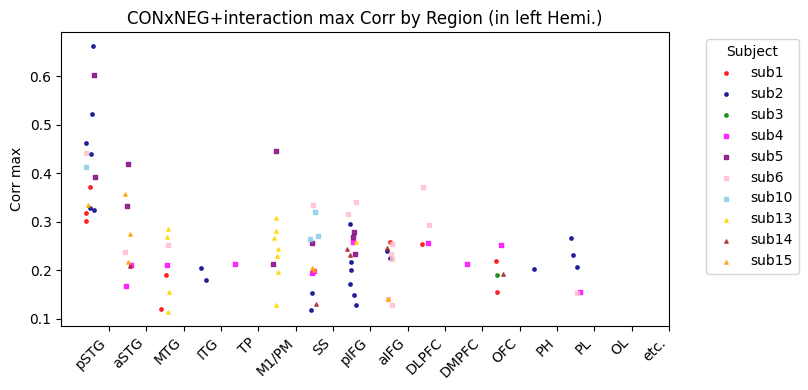

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(10):
 for area in range(16):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[3]]
    for i in areaindex_type3:
        sub_id = l_subject_indexs[i]
        sub_no_tot = total_subjects.index(lefthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = l_total_pat_r_Q_max[i,3]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("CONxNEG+interaction max Corr by Region (in left Hemi.)")
plt.tight_layout()
plt.savefig("CONXNEGinter_max_left_allarea.png", dpi=300, bbox_inches='tight', transparent=True)
#plt.ylim(None,0.8)
plt.show()


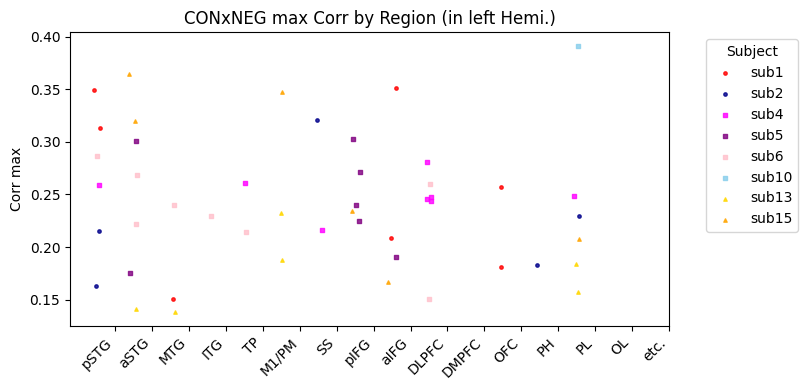

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(10):
 for area in range(16):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[2]]
    for i in areaindex_type3:
        sub_id = l_subject_indexs[i]
        sub_no_tot = total_subjects.index(lefthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = l_total_pat_r_Q_max[i,2]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("CONxNEG max Corr by Region (in left Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("CONXNEG_max_left.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


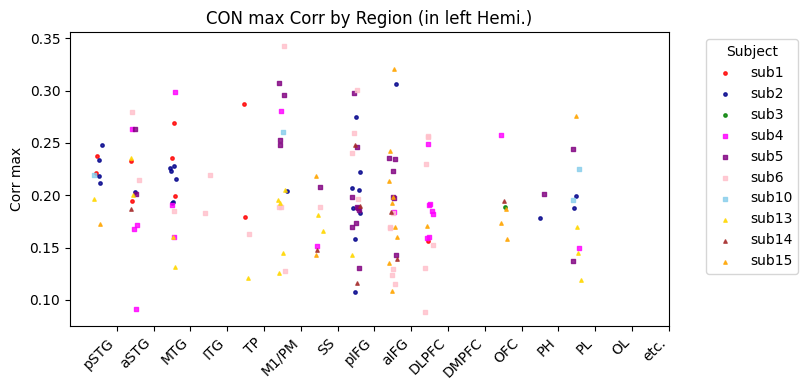

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(10):
 for area in range(16):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[1]]
    for i in areaindex_type3:
        sub_id = l_subject_indexs[i]
        sub_no_tot = total_subjects.index(lefthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = l_total_pat_r_Q_max[i,1]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("CON max Corr by Region (in left Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("CON_max_left.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

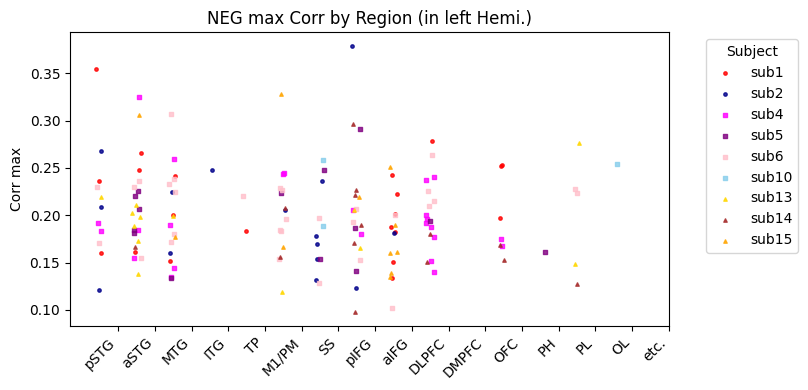

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(10):
 for area in range(16):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[0]]
    for i in areaindex_type3:
        sub_id = l_subject_indexs[i]
        sub_no_tot = total_subjects.index(lefthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = l_total_pat_r_Q_max[i,0]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("NEG max Corr by Region (in left Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("NEG_max_left.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

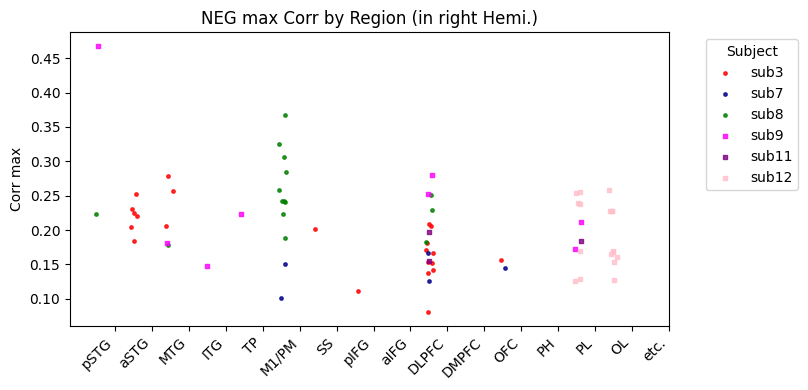

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(6):
 for area in range(16):
    area_str = area_name[area]
    areaindex = r_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in right_bestmodel_index[0]]
    for i in areaindex_type3:
        sub_id = r_subject_indexs[i]
        sub_no_tot = total_subjects.index(righthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = r_total_pat_r_Q_max[i,0]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("NEG max Corr by Region (in right Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("NEG_max_right.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

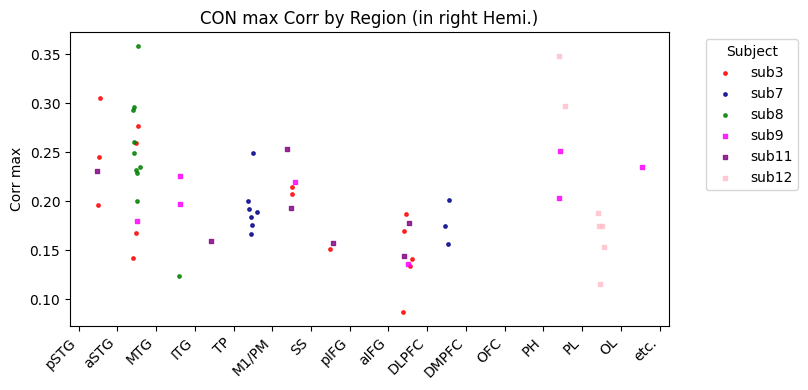

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(6):
 for area in range(16):
    area_str = area_name[area]
    areaindex = r_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in right_bestmodel_index[1]]
    for i in areaindex_type3:
        sub_id = r_subject_indexs[i]
        sub_no_tot = total_subjects.index(righthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = r_total_pat_r_Q_max[i,1]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("CON max Corr by Region (in right Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("CON_max_right.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

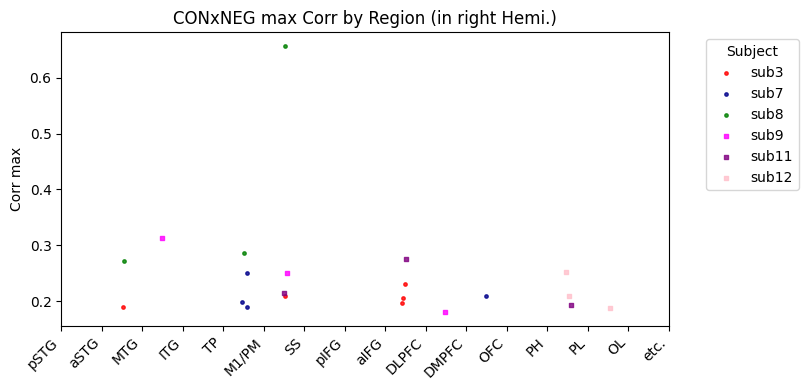

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(6):
 for area in range(16):
    area_str = area_name[area]
    areaindex = r_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in right_bestmodel_index[2]]
    for i in areaindex_type3:
        sub_id = r_subject_indexs[i]
        sub_no_tot = total_subjects.index(righthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = r_total_pat_r_Q_max[i,2]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("CONxNEG max Corr by Region (in right Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("CONXNEG_max_right.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

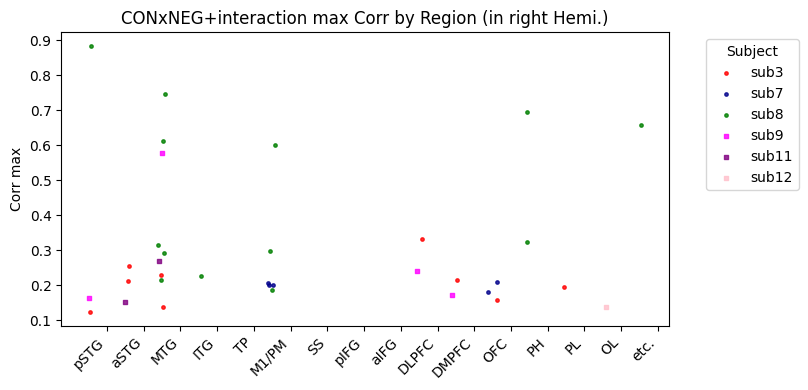

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8.2, 4))

for ids_ in range(6):
 for area in range(16):
    area_str = area_name[area]
    areaindex = r_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in right_bestmodel_index[3]]
    for i in areaindex_type3:
        sub_id = r_subject_indexs[i]
        sub_no_tot = total_subjects.index(righthemi_subjects[sub_id])
        if sub_id == ids_:
         q_val = r_total_pat_r_Q_max[i,3]
         jitter = np.random.uniform(-0.12, 0.12)
         ax.scatter(area + jitter-0.5, q_val, 
                   color=colors[sub_id], 
                   marker=markers[sub_id],
                   label=f"sub{sub_no_tot+1}",
                   s=6, alpha=0.8)

handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.05, 1), loc="upper left", title="Subject")
area_name_cut = [area_name[i] for i in range(14)] 

ax.set_xticks(range(0,16))
ax.set_xticklabels(area_name, rotation=45, ha='right')
ax.set_ylabel("Corr max")
#ax.set_xlabel("Area")
ax.set_title("CONxNEG+interaction max Corr by Region (in right Hemi.)")
plt.tight_layout()
#plt.ylim(None,0.8)
plt.savefig("CONXNEGINTER_max_right.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [74]:
area_name

['pSTG',
 'aSTG',
 'MTG',
 'ITG',
 'TP',
 'M1/PM',
 'SS',
 'pIFG',
 'aIFG',
 'DLPFC',
 'DMPFC',
 'OFC',
 'PH/PHT',
 'PL',
 'OL',
 'etc.']

In [78]:
l_total_pat_r_Q_max.shape

(442, 4)

14
9
8
2
1
9
12
15
10
4
1
5
1
5
0
0


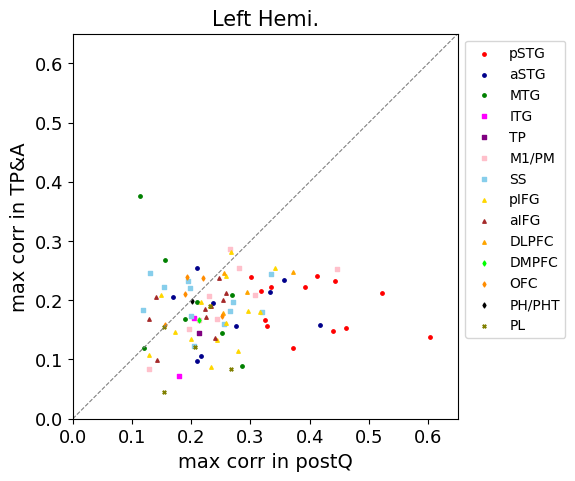

In [107]:
plt.figure(figsize=(5,5))
for area in range(16):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[3]]
    print(len(areaindex_type3))
    if len(areaindex_type3)>0:
        plt.scatter(l_total_pat_r_Q_max[areaindex_type3,3],l_total_pat_r_TR_A_totmax[areaindex_type3,3],c=colors[area],label=area_str,s=6,marker=markers[area])
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 0.65], [0, 0.65], color='gray', linestyle='--', linewidth=0.8)  
plt.xlim(0,0.65)
plt.ylim(0,0.65)

plt.xlabel("max corr in postQ",fontsize=14)
plt.ylabel("max corr in TP&A", fontsize=14)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title("Left Hemi.",fontsize=15)


savename="TR_A_linear_check_region_lh.png"
plt.savefig(savename, dpi=300,bbox_inches='tight')
plt.show()


3
3
9
1
0
6
0
0
0
2
2
3
2
1
1
1


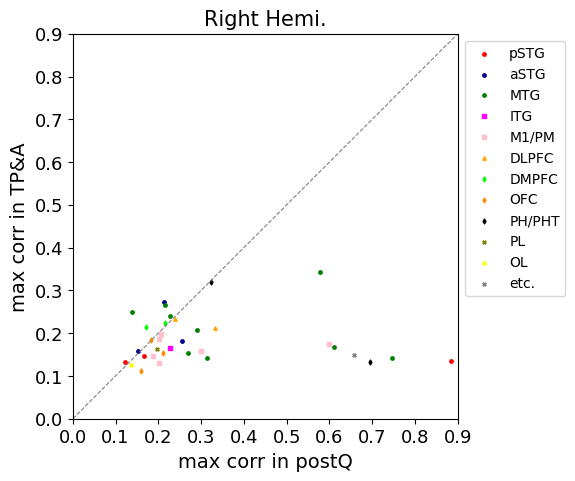

In [106]:
plt.figure(figsize=(5,5))
for area in range(16):
    area_str = area_name[area]
    areaindex = r_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in right_bestmodel_index[3]]
    print(len(areaindex_type3))
    if len(areaindex_type3)>0:
        plt.scatter(r_total_pat_r_Q_max[areaindex_type3,3],r_total_pat_r_TR_A_totmax[areaindex_type3,3],c=colors[area],label=area_str,s=6,marker=markers[area])
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 0.9], [0, 0.9], color='gray', linestyle='--', linewidth=0.8)  
plt.xlim(0,0.9)
plt.ylim(0,0.9)

plt.xlabel("max corr in postQ",fontsize=14)
plt.ylabel("max corr in TP&A", fontsize=14)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title("Right Hemi.",fontsize=15)


savename="TR_A_linear_check_region_rh.png"
plt.savefig(savename, dpi=300,bbox_inches='tight')
plt.show()

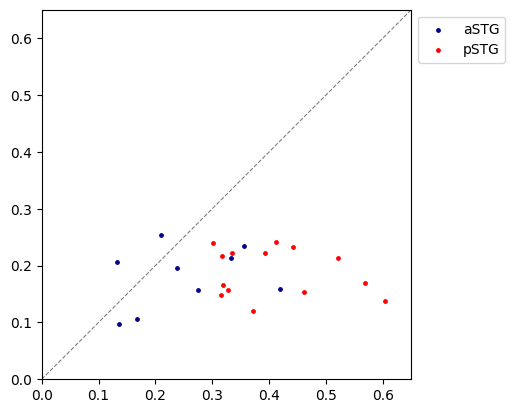

In [36]:
for area in range(1,-1,-1):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type3 = [i for i in areaindex if i in left_bestmodel_index[3]]
    plt.scatter(l_total_pat_r_Q_max[areaindex_type3],l_total_pat_r_TR_A_totmax[areaindex_type3],c=colors[area],label=area_str,s=6,marker=markers[area])
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 0.65], [0, 0.65], color='gray', linestyle='--', linewidth=0.8)  
plt.xlim(0,0.65)
plt.ylim(0,0.65)
plt.show()

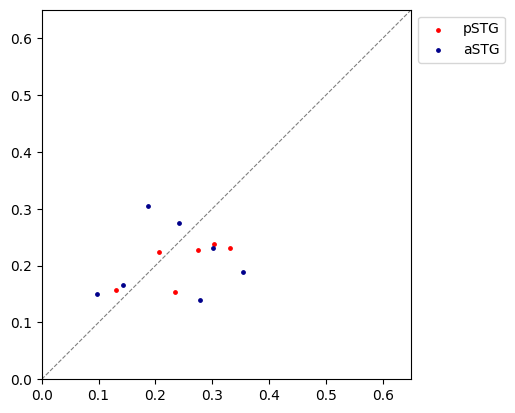

In [33]:
for area in range(2):
    area_str = area_name[area]
    areaindex = l_areaindex_total[area]
    areaindex_type2 = [i for i in areaindex if i in left_bestmodel_index[2]]
    plt.scatter(l_total_pat_r_Q_max[areaindex_type2],l_total_pat_r_TR_A_totmax[areaindex_type2],c=colors[area],label=area_str,s=6,marker=markers[area])
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 0.65], [0, 0.65], color='gray', linestyle='--', linewidth=0.8)  
plt.xlim(0,0.65)
plt.ylim(0,0.65)
plt.show()

In [38]:
l_pSTGindex_type3_eachpat

[[27, 32, 33],
 [47, 48, 49, 53, 54, 77],
 [],
 [],
 [208, 209],
 [277],
 [323],
 [],
 [],
 [428]]

In [43]:
l_total_pat_r_Q_max.shape

(442,)

In [44]:
l_pSTGacti_type3_eachpat=[[] for i in range(10)]
for ch in areaindex_type3:
    l_pSTGacti_type3_eachpat[l_subject_indexs[ch]].append(l_total_pat_r_Q_max[ch])

In [45]:
l_pSTGacti_type3_eachpat

[[0.3171361162554871, 0.3709771098149513, 0.30066025126760676],
 [0.5678559037339628,
  0.31498619161544106,
  0.46205009696786326,
  0.3275859986622737,
  0.5218831447185814,
  0.3189268981701063],
 [],
 [],
 [0.3924935303756374, 0.6037207278404345],
 [0.44275383772957383],
 [0.41287583777013204],
 [],
 [],
 [0.3350953424913953]]